# Primera pregunta

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histograma de S(λ)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histograma de S(λ)' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'S(λ)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'S(λ)' in 'mbcsToSbcs': dot substituted for <bb>”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  estadisticos
D = 0.0045531, p-value = 0.9857
alternative hypothesis: two-sided

Intervalo de confianza exacto del 95% para λ: [ 0.3304857 , 0.8218707 ]
Intervalo de confianza aproximado del 95% para λ (n grande): [ 0.4898407 , 0.6069757 ]
Cobertura empírica del intervalo aproximado: 0.943 


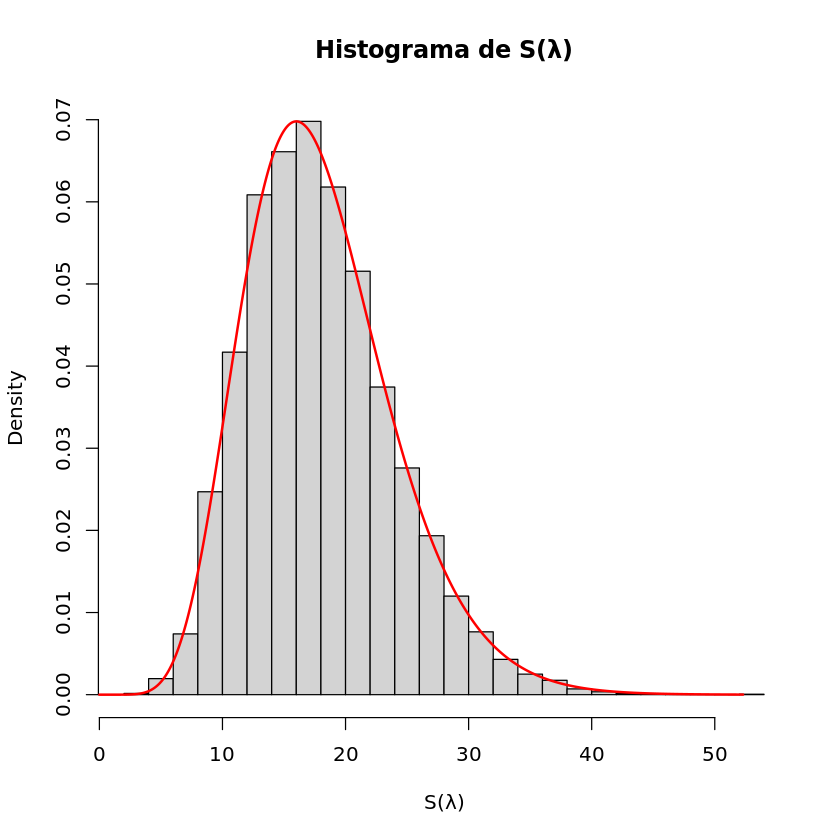

In [1]:
# Pregunta 1: Muestra aleatoria de distribución exponencial

# a) Demostración de la cantidad pivotal

# Para demostrar que S(λ) = 2λ∑(Xi - X(1)) ~ χ²(2(n-1)) vamos a utilizar la
# teoría de transformación de variables aleatorias y la definición de la distribución chi-cuadrado.

# La función de densidad conjunta de X(1) y el resto de la muestra está dada por:
# f(y, x2, ..., xn) = nf(y)∏(i=2 to n)f(xi) · 1(0,∞)(y)∏(i=2 to n)1(y,∞)(xi)

# Primero, vamos a simular datos para verificar el resultado:
verificar_chi_cuadrado <- function(n, lambda = 1, mu = 0, num_simulaciones = 10000) {
    # Función para generar una muestra de la distribución exponencial
    # y calcular el estadístico S(λ)
    calcular_estadistico <- function() {
        # Generar muestra exponencial
        X <- mu + rexp(n, rate = lambda)
        # Calcular el mínimo
        X_min <- min(X)
        # Calcular el estadístico S(λ)
        S_lambda <- 2 * lambda * sum(X - X_min)
        return(S_lambda)
    }

    # Generar múltiples valores del estadístico
    estadisticos <- replicate(num_simulaciones, calcular_estadistico())

    # Graficar para comparar con la distribución chi-cuadrado
    hist(estadisticos,
        probability = TRUE, main = "Histograma de S(λ)",
        xlab = "S(λ)", breaks = 30
    )

    # Añadir la curva de densidad de la chi-cuadrado con 2(n-1) grados de libertad
    x <- seq(0, max(estadisticos), length.out = 1000)
    lines(x, dchisq(x, df = 2 * (n - 1)), col = "red", lwd = 2)

    # Realizar la prueba de Kolmogorov-Smirnov para verificar el ajuste
    ks_test <- ks.test(estadisticos, "pchisq", df = 2 * (n - 1))

    # Devolver el resultado de la prueba
    return(ks_test)
}

# Verificar para n=10
set.seed(123)
ks_resultado <- verificar_chi_cuadrado(n = 10)
print(ks_resultado)

# b) Construcción de un intervalo de confianza exacto del 95% para λ

# Usando la cantidad pivotal S(λ) ~ χ²(2(n-1)), podemos construir un intervalo de confianza
# exacto para λ del 95%:

construir_IC_exacto <- function(muestra, nivel_confianza = 0.95) {
    n <- length(muestra)
    X_min <- min(muestra)
    sum_diff <- sum(muestra - X_min)

    # Valores críticos de la distribución chi-cuadrado
    alpha <- 1 - nivel_confianza
    chi_lower <- qchisq(alpha / 2, df = 2 * (n - 1))
    chi_upper <- qchisq(1 - alpha / 2, df = 2 * (n - 1))

    # Límites del intervalo de confianza
    lambda_lower <- chi_lower / (2 * sum_diff)
    lambda_upper <- chi_upper / (2 * sum_diff)

    return(c(lambda_lower, lambda_upper))
}

# Ejemplo con datos simulados
set.seed(456)
muestra_ejemplo <- rexp(20, rate = 0.5)
IC_exacto <- construir_IC_exacto(muestra_ejemplo)
cat("Intervalo de confianza exacto del 95% para λ: [", IC_exacto[1], ",", IC_exacto[2], "]\n")

# c) Intervalo de confianza aproximado para λ con n grande

# Para n grande, podemos utilizar la aproximación normal de la distribución chi-cuadrado:
# χ²(v) ≈ N(v, 2v) para v grande

construir_IC_aproximado <- function(muestra, nivel_confianza = 0.95) {
    n <- length(muestra)
    X_min <- min(muestra)
    sum_diff <- sum(muestra - X_min)

    # Grados de libertad
    v <- 2 * (n - 1)

    # Valor crítico de la distribución normal estándar
    z <- qnorm(1 - (1 - nivel_confianza) / 2)

    # Límites del intervalo de confianza aproximado
    S_lambda <- 2 * sum_diff # Asumimos λ=1 para el cálculo

    lambda_lower <- v / (S_lambda + z * sqrt(2 * v))
    lambda_upper <- v / (S_lambda - z * sqrt(2 * v))

    return(c(lambda_lower, lambda_upper))
}

# Ejemplo con datos simulados para n grande
set.seed(789)
muestra_grande <- rexp(100, rate = 0.5)
IC_aproximado <- construir_IC_aproximado(muestra_grande)
cat("Intervalo de confianza aproximado del 95% para λ (n grande): [", IC_aproximado[1], ",", IC_aproximado[2], "]\n")

# Verificar la cobertura del intervalo de confianza aproximado
verificar_cobertura <- function(n, lambda = 1, nivel_confianza = 0.95, num_simulaciones = 1000) {
    cobertura <- 0

    for (i in 1:num_simulaciones) {
        muestra <- rexp(n, rate = lambda)
        IC <- construir_IC_aproximado(muestra, nivel_confianza)

        if (lambda >= IC[1] && lambda <= IC[2]) {
            cobertura <- cobertura + 1
        }
    }

    return(cobertura / num_simulaciones)
}

# Verificar cobertura para n=100
set.seed(101)
cobertura_aproximada <- verificar_cobertura(n = 100)
cat("Cobertura empírica del intervalo aproximado:", cobertura_aproximada, "\n")

# Segunda pregunta

Intervalo de confianza de 0.954 para β: [ 1.458893 , 2.186241 ]
Intervalo de confianza de 0.954 para μ = 4β: [ 5.835574 , 8.744964 ]
$estadistico_z
[1] -1.25

$p_valor_normal
[1] 0.1056498

$decision_normal
[1] "No rechazar H₀"

$valor_critico_exacto
[1] 0.2692457

$p_valor_exacto
[1] 1

$decision_exacta
[1] "No rechazar H₀"



Warning message in title(...):
“conversion failure on 'Distribución de X̄ bajo H₀: μ = 8' in 'mbcsToSbcs': dot substituted for <cc>”
Warning message in title(...):
“conversion failure on 'Distribución de X̄ bajo H₀: μ = 8' in 'mbcsToSbcs': dot substituted for <84>”
Warning message in title(...):
“conversion failure on 'Distribución de X̄ bajo H₀: μ = 8' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on 'Distribución de X̄ bajo H₀: μ = 8' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in title(...):
“conversion failure on 'Distribución de X̄ bajo H₀: μ = 8' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(...):
“conversion failure on 'Distribución de X̄ bajo H₀: μ = 8' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'Distribución de X̄ bajo H₀: μ = 8' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in title(...):
“conversion failure on 'Valor de X̄' i

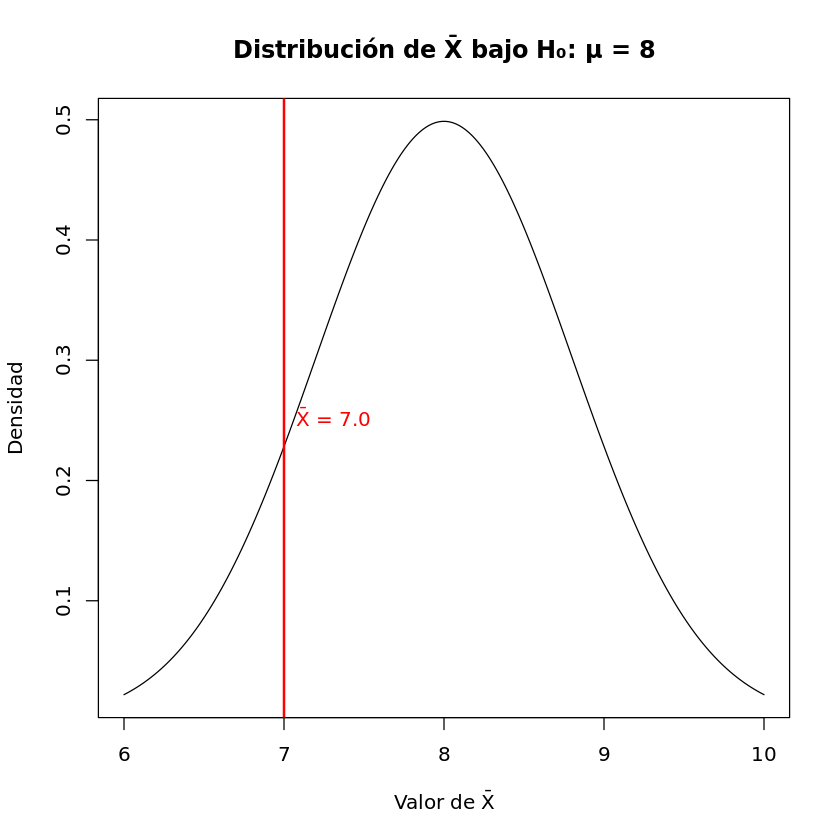

In [2]:
# Pregunta 2: Muestra aleatoria de distribución Gamma con α = 4 y β > 0

# a) Intervalo de confianza aproximado usando el TCL

# Sabemos que si X ~ Gamma(α, β), entonces:
# E[X] = α*β y Var[X] = α*β²

# En este caso, α = 4, por lo que E[X] = 4β y Var[X] = 4β²
# Para la media muestral X̄ con n = 25, tenemos por el TCL:
# X̄ ~ N(4β, 4β²/25)

# Estandarizando:
# (X̄ - 4β)/(√(4β²/25)) ~ N(0, 1)

# O equivalentemente:
# (5X̄/(2β) - 10) ~ N(0, 1)

# Construyamos el intervalo de confianza de nivel 0.954:
construir_IC_gamma <- function(xbar, n = 25, alpha = 4, nivel_confianza = 0.954) {
    # Valor crítico para un nivel de confianza de 0.954
    z <- qnorm((1 + nivel_confianza) / 2)

    # Para la expresión (5X̄/(2β) - 10) ~ N(0, 1), despejamos β:
    # 5X̄/(2β) - 10 = ±z
    # 5X̄/(2β) = 10 ± z
    # 5X̄ = (10 ± z)*2β
    # β = 5X̄/[2(10 ± z)]

    beta_lower <- 5 * xbar / (2 * (10 + z))
    beta_upper <- 5 * xbar / (2 * (10 - z))

    # Como la media es μ = 4β, calculamos los límites para μ
    mu_lower <- 4 * beta_lower
    mu_upper <- 4 * beta_upper

    return(list(
        beta_interval = c(beta_lower, beta_upper),
        mu_interval = c(mu_lower, mu_upper)
    ))
}

# Calculemos el intervalo de confianza para β y μ con un nivel de confianza de 0.954
# con X̄ = 7.0 (valor usado en el inciso b)
xbar <- 7.0
IC <- construir_IC_gamma(xbar)
cat("Intervalo de confianza de 0.954 para β: [", IC$beta_interval[1], ",", IC$beta_interval[2], "]\n")
cat("Intervalo de confianza de 0.954 para μ = 4β: [", IC$mu_interval[1], ",", IC$mu_interval[2], "]\n")

# b) Prueba de hipótesis: H₀: μ ≥ 8 vs Hₐ: μ < 8
# Con n = 25, X̄ = 7.0 y nivel de significancia α = 0.05

prueba_hipotesis_gamma <- function(xbar, mu0 = 8, n = 25, alpha = 4, nivel_sig = 0.05) {
    # Si H₀: μ ≥ 8, entonces β₀ ≥ 2 (ya que μ = 4β)
    beta0 <- mu0 / 4

    # Calculamos el estadístico de prueba usando la aproximación normal
    # (5X̄/(2β₀) - 10) ~ N(0, 1) bajo H₀
    z_estadistico <- 5 * xbar / (2 * beta0) - 10

    # Calculamos el valor-p (prueba unilateral inferior)
    p_valor_normal <- pnorm(z_estadistico)

    # Decisión con la aproximación normal
    decision_normal <- ifelse(p_valor_normal < nivel_sig,
        "Rechazar H₀",
        "No rechazar H₀"
    )

    # Cálculo exacto usando la distribución de X̄
    # Si X ~ Gamma(α, β), entonces n*X̄ ~ Gamma(n*α, β/n)
    # En este caso, 25*X̄ ~ Gamma(100, β/25)
    # Para β = 2 (correspondiente a μ = 8), tenemos 25*X̄ ~ Gamma(100, 2/25 = 0.08)
    # El valor crítico sería el cuantil 0.05 de esta distribución
    valor_critico_exacto <- qgamma(nivel_sig, shape = n * alpha, scale = beta0 / n) / n
    decision_exacta <- ifelse(xbar < valor_critico_exacto,
        "Rechazar H₀",
        "No rechazar H₀"
    )

    # Valor-p exacto
    p_valor_exacto <- pgamma(n * xbar, shape = n * alpha, scale = beta0 / n)

    return(list(
        estadistico_z = z_estadistico,
        p_valor_normal = p_valor_normal,
        decision_normal = decision_normal,
        valor_critico_exacto = valor_critico_exacto,
        p_valor_exacto = p_valor_exacto,
        decision_exacta = decision_exacta
    ))
}

# Realizar la prueba con X̄ = 7.0
resultado_prueba <- prueba_hipotesis_gamma(xbar = 7.0)
print(resultado_prueba)

# Visualizar la distribución y el valor observado
beta0 <- 8 / 4 # β₀ = 2 correspondiente a μ₀ = 8
x_values <- seq(6, 10, by = 0.01)
y_normal <- dnorm(x_values, mean = 4 * beta0, sd = sqrt(4 * beta0^2 / 25))

plot(x_values, y_normal,
    type = "l",
    main = "Distribución de X̄ bajo H₀: μ = 8",
    xlab = "Valor de X̄", ylab = "Densidad"
)
abline(v = 7.0, col = "red", lwd = 2)
text(7.0, max(y_normal) / 2, "X̄ = 7.0", pos = 4, col = "red")

# Tercera pregunta

  n poisson_direct poisson_exponential_family are_equal
1 0     0.08208500                 0.08208500      TRUE
2 1     0.20521250                 0.20521250      TRUE
3 2     0.25651562                 0.25651562      TRUE
4 3     0.21376302                 0.21376302      TRUE
5 4     0.13360189                 0.13360189      TRUE
6 5     0.06680094                 0.06680094      TRUE
$estadistico
[1] 13

$valor_critico
[1] 15

$p_valor
[1] 0.2084435

$significancia_real
[1] 0.0487404

$decision
[1] "No rechazar H₀: λ = 1"

$potencia_lambda_1_3
[1] 0.2363931

$estadistico
[1] 17

$valor_critico
[1] 26

$p_valor
[1] 0.7789258

$significancia_real
[1] 0.07788678

$decision
[1] "No rechazar H₀: λ = 1"

$potencia_lambda_1_3
[1] 0.4480961

Potencia para n = 10 y λ = 1.3: 0.2363931 
Potencia para n = 20 y λ = 1.3: 0.4480961 


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₁: λ = 1.3' in 'mbcsToSbcs': dot substituted 

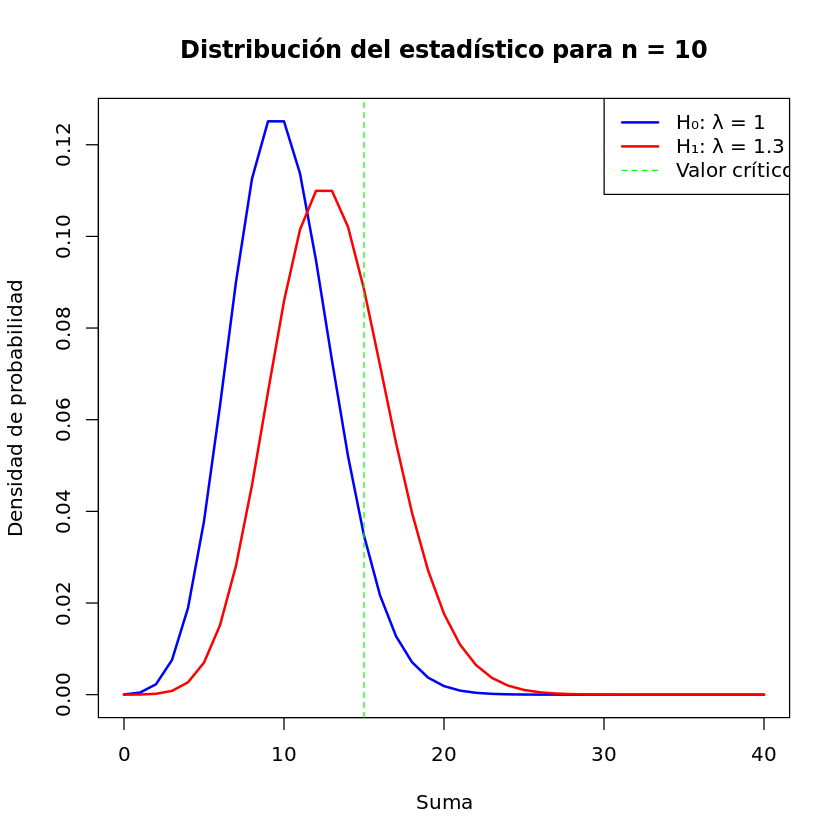

Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₀: λ = 1' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on 'H₁: λ = 1.3' in 'mbcsToSbcs': dot substituted 

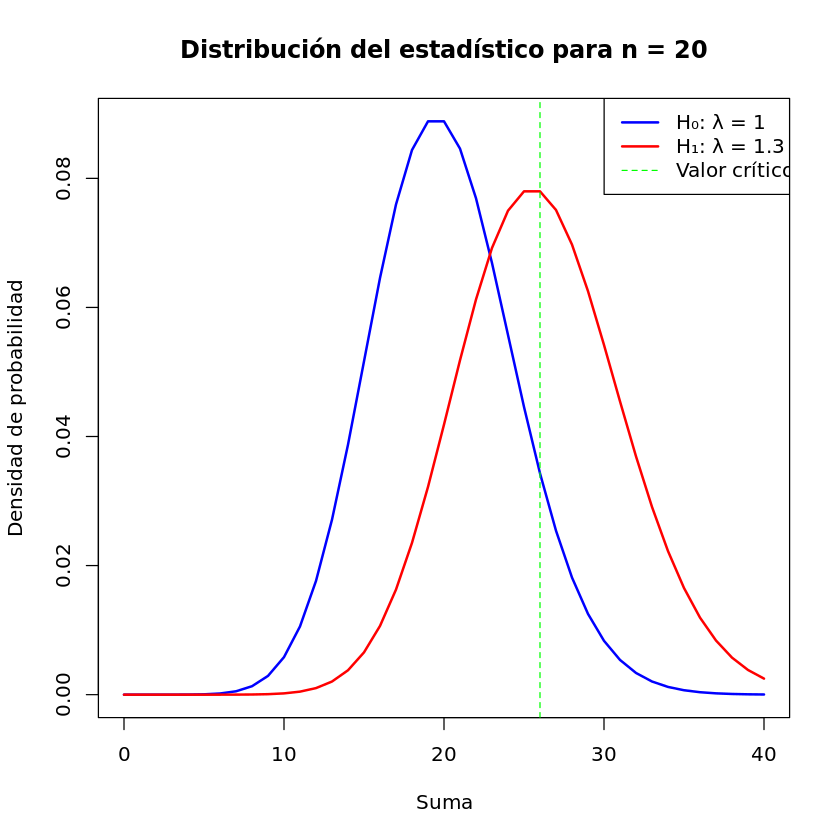

In [3]:
# Pregunta 3: Familia exponencial y prueba UMP

# a) Verificación de que la prueba basada en la región R = {x ∈ R^n: ∑d(x_i) > c} es UMP
# Esta es una demostración teórica que se basa en el Lema de Neyman-Pearson
# para el caso de la familia exponencial. No implementaremos código para esta parte.

# b) Mostrar que la distribución Poisson es miembro de la familia exponencial

# Recordemos que la f.d.p. de la distribución Poisson es:
# f(n; λ) = e^(-λ) * λ^n / n! para n = 0, 1, 2, ...

# Reescribamos esto para mostrar que es miembro de la familia exponencial:
# f(n; λ) = e^(-λ) * λ^n / n!
#         = e^(-λ) * e^(n*ln(λ)) / n!
#         = (1/n!) * exp(n*ln(λ) - λ)

# Comparando con la forma general de la familia exponencial:
# f(x; θ) = a(θ)b(x)exp{c(θ)d(x)}

# Podemos identificar:
# a(λ) = e^(-λ)
# b(n) = 1/n!
# c(λ) = ln(λ)
# d(n) = n

# Vamos a verificar esto:
poisson_familia_exponencial <- function(n, lambda) {
    # Calcular la probabilidad Poisson directamente
    poisson_direct <- dpois(n, lambda)

    # Calcular usando la forma de la familia exponencial
    a_lambda <- exp(-lambda)
    b_n <- 1 / factorial(n)
    c_lambda <- log(lambda)
    d_n <- n

    poisson_exponential_family <- a_lambda * b_n * exp(c_lambda * d_n)

    # Comparar ambos cálculos
    return(list(
        poisson_direct = poisson_direct,
        poisson_exponential_family = poisson_exponential_family,
        are_equal = all.equal(poisson_direct, poisson_exponential_family)
    ))
}

# Verificar para algunos valores
verify_n <- 0:5
verify_lambda <- 2.5
verification <- lapply(verify_n, function(n) poisson_familia_exponencial(n, verify_lambda))
verification_df <- data.frame(
    n = verify_n,
    poisson_direct = sapply(verification, function(x) x$poisson_direct),
    poisson_exponential_family = sapply(verification, function(x) x$poisson_exponential_family),
    are_equal = sapply(verification, function(x) x$are_equal)
)
print(verification_df)

# c) Construcción de prueba UMP para H₀: λ = 1 vs H₁: λ > 1

# Según el resultado del inciso anterior, la prueba UMP rechaza H₀
# cuando ∑d(x_i) > c, donde d(x_i) = x_i para la Poisson.
# Es decir, rechazamos cuando ∑x_i > c
# Para una muestra de tamaño 10, la suma ∑x_i bajo H₀ (λ = 1) sigue una Poisson(10)

prueba_UMP_poisson <- function(muestra, significancia = 0.08) {
    # La suma de variables aleatorias Poisson(λ) es Poisson(n*λ)
    n <- length(muestra)
    suma_muestra <- sum(muestra)

    # Bajo H₀: λ = 1, la suma sigue una distribución Poisson(n)
    # Encontramos el valor crítico c tal que P(∑x_i > c | λ = 1) ≈ significancia
    # La aproximación más cercana se logra con el cuantil (1-significancia)
    valor_critico <- qpois(1 - significancia, lambda = n)

    # Calcular el p-valor
    p_valor <- 1 - ppois(suma_muestra - 1, lambda = n)

    # Decisión
    decision <- ifelse(suma_muestra > valor_critico,
        "Rechazar H₀: λ = 1",
        "No rechazar H₀: λ = 1"
    )

    # Calcular la potencia para λ = 1.3
    lambda_alt <- 1.3
    potencia <- 1 - ppois(valor_critico, lambda = n * lambda_alt)

    return(list(
        estadistico = suma_muestra,
        valor_critico = valor_critico,
        p_valor = p_valor,
        significancia_real = 1 - ppois(valor_critico, lambda = n),
        decision = decision,
        potencia_lambda_1_3 = potencia
    ))
}

# Ejecutar una simulación para n = 10
set.seed(123)
muestra_poisson_10 <- rpois(10, lambda = 1) # Muestra bajo H₀
resultado_10 <- prueba_UMP_poisson(muestra_poisson_10)
print(resultado_10)

# d) Construir la prueba con n = 20
set.seed(456)
muestra_poisson_20 <- rpois(20, lambda = 1) # Muestra bajo H₀
resultado_20 <- prueba_UMP_poisson(muestra_poisson_20, significancia = 0.08)
print(resultado_20)

# Comparar la potencia entre n = 10 y n = 20
cat("Potencia para n = 10 y λ = 1.3:", resultado_10$potencia_lambda_1_3, "\n")
cat("Potencia para n = 20 y λ = 1.3:", resultado_20$potencia_lambda_1_3, "\n")

# Visualizar la distribución del estadístico bajo H₀ y H₁
x_values <- 0:40
y_h0_n10 <- dpois(x_values, lambda = 10) # Distribución bajo H₀ con n=10
y_h1_n10 <- dpois(x_values, lambda = 10 * 1.3) # Distribución bajo H₁ con n=10 y λ=1.3
y_h0_n20 <- dpois(x_values, lambda = 20) # Distribución bajo H₀ con n=20
y_h1_n20 <- dpois(x_values, lambda = 20 * 1.3) # Distribución bajo H₁ con n=20 y λ=1.3

# Gráfico para n = 10
plot(x_values, y_h0_n10,
    type = "l", col = "blue", lwd = 2,
    main = "Distribución del estadístico para n = 10",
    xlab = "Suma", ylab = "Densidad de probabilidad"
)
lines(x_values, y_h1_n10, col = "red", lwd = 2)
abline(v = resultado_10$valor_critico, col = "green", lty = 2)
legend("topright",
    legend = c("H₀: λ = 1", "H₁: λ = 1.3", "Valor crítico"),
    col = c("blue", "red", "green"), lty = c(1, 1, 2), lwd = c(2, 2, 1)
)

# Gráfico para n = 20
plot(x_values, y_h0_n20,
    type = "l", col = "blue", lwd = 2,
    main = "Distribución del estadístico para n = 20",
    xlab = "Suma", ylab = "Densidad de probabilidad"
)
lines(x_values, y_h1_n20, col = "red", lwd = 2)
abline(v = resultado_20$valor_critico, col = "green", lty = 2)
legend("topright",
    legend = c("H₀: λ = 1", "H₁: λ = 1.3", "Valor crítico"),
    col = c("blue", "red", "green"), lty = c(1, 1, 2), lwd = c(2, 2, 1)
)

# Cuarta pregunta

In [7]:
# Pregunta 4: Boletos sorpresa en un centro comercial

# Tenemos la siguiente tabla de probabilidades para los números en los boletos:
# x | 1 | 2 | 3 | 4 | 5
# p | 5/15 | 4/15 | 3/15 | 2/15 | 1/15

# a) Hipótesis nula (H₀) y alternativa (Hₐ) en palabras:
# H₀: Hoy es un día común (solo el número 3 está premiado)
# Hₐ: Hoy es un día especial (los números 3, 4 y 5 están premiados)

# b) Hipótesis estadísticas:
# Si p es la probabilidad de que un boleto sea premiado:
# H₀: p = 3/15 = 0.2 (solo el número 3 está premiado)
# Hₐ: p = (3+2+1)/15 = 6/15 = 0.4 (los números 3, 4 y 5 están premiados)

# c) Construcción de la prueba más potente para 
# H₀: p = 0.2 vs H₁: p = 0.4

# El estadístico de prueba es X = número de boletos premiados en n = 12 clientes
# Bajo H₀, X ~ Binomial(12, 0.2)
# Bajo H₁, X ~ Binomial(12, 0.4)

# Según el lema de Neyman-Pearson, la prueba más potente rechaza H₀ cuando
# L(x|p=0.4)/L(x|p=0.2) > k, donde k es una constante

# La razón de verosimilitud es:
# LR(x) = [C(12,x) * 0.4^x * 0.6^(12-x)] / [C(12,x) * 0.2^x * 0.8^(12-x)]
#       = (0.4/0.2)^x * (0.6/0.8)^(12-x)
#       = 2^x * (0.75)^(12-x)
#       = 2^x * 0.75^12 / 0.75^x
#       = 0.75^12 * (2/0.75)^x
#       = 0.75^12 * (8/3)^x

# Como 0.75^12 es una constante positiva, la prueba rechaza H₀ cuando (8/3)^x > k',
# lo que equivale a rechazar cuando x > c' (ya que (8/3) > 1)

# Por lo tanto, el estadístico de prueba es X ~ Binomial(12, p)
# y su distribución nula es Binomial(12, 0.2)

construir_prueba_binomial <- function(n = 12, p0 = 0.2, p1 = 0.4, alpha_objetivo = 0.1) {
  # Encontrar el valor crítico c tal que P(X > c | p = p0) sea lo más cercano a alpha_objetivo
  valores_x <- 0:n
  prob_acumulada <- pbinom(valores_x, size = n, prob = p0)
  
  # Encontrar el mayor valor x tal que P(X ≤ x | p = p0) ≤ 1 - alpha_objetivo
  valor_critico <- max(valores_x[prob_acumulada <= 1 - alpha_objetivo])
  
  # La región de rechazo es X > valor_critico
  region_rechazo <- valores_x[valores_x > valor_critico]
  
  # Calcular el nivel de significancia real
  alpha_real <- 1 - pbinom(valor_critico, size = n, prob = p0)
  
  # Calcular la potencia (1 - β)
  potencia <- 1 - pbinom(valor_critico, size = n, prob = p1)
  
  # Calcular β (probabilidad de error tipo II)
  beta <- 1 - potencia
  
  return(list(
    valor_critico = valor_critico,
    region_rechazo = region_rechazo,
    alpha_real = alpha_real,
    beta = beta,
    potencia = potencia
  ))
}

# d) Región de rechazo y nivel de significancia real
resultado_prueba <- construir_prueba_binomial()
cat("Región de rechazo: X >", resultado_prueba$valor_critico, "\n")
cat("Nivel de significancia real:", resultado_prueba$alpha_real, "\n")

# e) Probabilidad del Error Tipo II
cat("Probabilidad del Error Tipo II (β):", resultado_prueba$beta, "\n")

# f) Valor-p para 3 boletos premiados de 12 clientes
valor_p_3_de_12 <- 1 - pbinom(3 - 1, size = 12, prob = 0.2)
cat("Valor-p para 3 boletos premiados de 12 clientes:", valor_p_3_de_12, "\n")

# g) Valor-p para 11 boletos premiados de 40 clientes
# Usando la aproximación normal para la distribución binomial
# Cuando n es grande y np, n(1-p) > 5, podemos usar la aproximación:
# X ~ Binomial(n, p) ≈ N(np, np(1-p))

valor_p_11_de_40_exacto <- 1 - pbinom(11 - 1, size = 40, prob = 0.2)

# Usando la aproximación normal
# Estandarizamos: Z = (X - np) / √(np(1-p))
z_11_de_40 <- (11 - 40 * 0.2) / sqrt(40 * 0.2 * 0.8)
valor_p_11_de_40_normal <- 1 - pnorm(z_11_de_40)

cat("Valor-p exacto para 11 boletos premiados de 40 clientes:", valor_p_11_de_40_exacto, "\n")
cat("Valor-p aproximado (normal) para 11 boletos premiados de 40 clientes:", valor_p_11_de_40_normal, "\n")

# Verificar si se cumplen las condiciones para la aproximación normal
condicion_np <- 40 * 0.2
condicion_nq <- 40 * 0.8
cat("Condición np =", condicion_np, "(debe ser > 5)\n")
cat("Condición n(1-p) =", condicion_nq, "(debe ser > 5)\n")

# h) Tamaño de muestra para estimar la proporción con error máximo de 0.10 y confianza del 95%
calcular_tamano_muestra <- function(error_maximo = 0.10, nivel_confianza = 0.95, p_estimada = 0.2) {
  # Z para el nivel de confianza deseado
  z <- qnorm(1 - (1 - nivel_confianza) / 2)
  n <- (z^2 * p_estimada * (1 - p_estimada)) / (error_maximo^2)
  return(ceiling(n))
}

Región de rechazo: X > 3 
Nivel de significancia real: 0.2054311 
Probabilidad del Error Tipo II (β): 0.2253373 
Valor-p para 3 boletos premiados de 12 clientes: 0.4416543 
Valor-p exacto para 11 boletos premiados de 40 clientes: 0.1607691 
Valor-p aproximado (normal) para 11 boletos premiados de 40 clientes: 0.11784 
Condición np = 8 (debe ser > 5)
Condición n(1-p) = 32 (debe ser > 5)


# Ejercicio 5

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Distribución de √n(θ̂ - θ)' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Distribución de √n(θ̂ - θ)' in 'mbcsToSbcs': dot substituted for <88>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Distribución de √n(θ̂ - θ)' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Distribución de √n(θ̂ - θ)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Distribución de √n(θ̂ - θ)' in 'mbcsToSbcs': dot substituted for <b8>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Distribución de

$theta_true
[1] 0.3

$media_empirica
[1] 0.29905

$varianza_empirica
[1] 0.001038186

$var_teorica_norm
[1] 1.05e-05

$E_estadistico
[1] 100

$Var_estadistico
[1] 50

$c_aproximado
[1] 111.6309

$tamano_muestra
[1] 80

$potencia_alcanzada
[1] 0.8167947



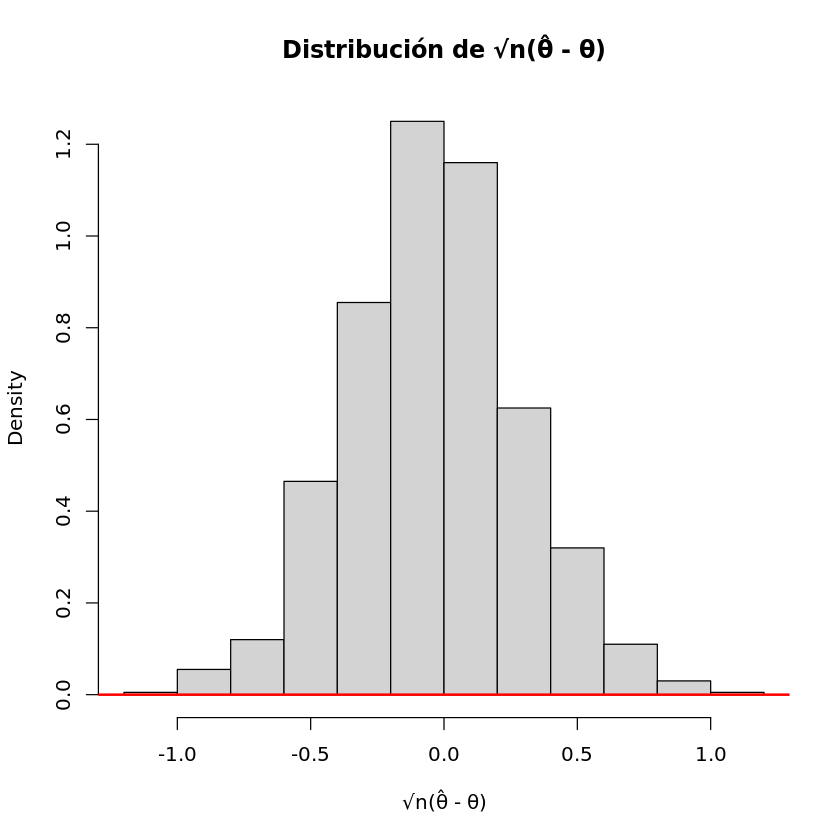

In [8]:
# Pregunta 5: Modelo de equilibrio Hardy-Weinberg

# En este modelo, los sujetos se clasifican en tres grupos con probabilidades:
# θ², 2θ(1-θ) y (1-θ)²
# Y = (Y₁, Y₂, Y₃) sigue una distribución multinomial

# a) Encontrar el estimador de máxima verosimilitud de θ y su distribución asintótica

# La función de log-verosimilitud es:
# l(θ) = log(n!) - log(y₁!) - log(y₂!) - log(y₃!) + 2y₁log(θ) + y₂log(2θ(1-θ)) + 2y₃log(1-θ)
#      = constante + 2y₁log(θ) + y₂log(2) + y₂log(θ) + y₂log(1-θ) + 2y₃log(1-θ)
#      = constante + 2y₁log(θ) + y₂log(2) + y₂log(θ) + y₂log(1-θ) + 2y₃log(1-θ)
#      = constante + log(θ)(2y₁ + y₂) + log(1-θ)(y₂ + 2y₃)

# Para encontrar el EMV, derivamos respecto a θ e igualamos a cero:
# d/dθ l(θ) = (2y₁ + y₂)/θ - (y₂ + 2y₃)/(1-θ) = 0
# (2y₁ + y₂)(1-θ) = (y₂ + 2y₃)θ
# 2y₁ + y₂ - 2y₁θ - y₂θ = y₂θ + 2y₃θ
# 2y₁ + y₂ = 2y₁θ + y₂θ + y₂θ + 2y₃θ = θ(2y₁ + 2y₂ + 2y₃) = 2nθ
# θ = (2y₁ + y₂)/(2n)

# Veamos esto con un ejemplo:
estimar_theta <- function(y1, y2, y3) {
    n <- y1 + y2 + y3
    theta_hat <- (2 * y1 + y2) / (2 * n)
    return(theta_hat)
}

# Calcular la información de Fisher:
informacion_fisher <- function(theta, n) {
    # I(θ) = n * (2/θ + 2/(1-θ))
    return(n * (2 / theta + 2 / (1 - theta)))
}

# Distribución asintótica:
# √n(θ̂ - θ) ~ N(0, 1/I(θ)) aproximadamente para n grande
# donde I(θ) es la información de Fisher

# Verifiquemos esto mediante simulaciones:
simular_distribucion_theta_hat <- function(theta_true = 0.3, n = 100, num_sim = 1000) {
    theta_hats <- numeric(num_sim)

    for (i in 1:num_sim) {
        # Simular una muestra de la distribución multinomial
        prob <- c(theta_true^2, 2 * theta_true * (1 - theta_true), (1 - theta_true)^2)
        y <- rmultinom(1, size = n, prob = prob)
        y1 <- y[1]
        y2 <- y[2]
        y3 <- y[3]

        # Calcular el estimador
        theta_hats[i] <- estimar_theta(y1, y2, y3)
    }

    # Calcular media y varianza empíricas
    media_empirica <- mean(theta_hats)
    varianza_empirica <- var(theta_hats)

    # Varianza teórica según la distribución asintótica
    var_teorica <- 1 / (informacion_fisher(theta_true, n))
    var_teorica_norm <- var_teorica / n # Normalizado por √n

    # Comparar distribución empírica con teórica
    hist(sqrt(n) * (theta_hats - theta_true),
        probability = TRUE,
        main = "Distribución de √n(θ̂ - θ)",
        xlab = "√n(θ̂ - θ)"
    )

    # Añadir la curva de densidad normal teórica
    x <- seq(-3, 3, length.out = 100)
    lines(x, dnorm(x, mean = 0, sd = sqrt(var_teorica_norm)), col = "red", lwd = 2)

    return(list(
        theta_true = theta_true,
        media_empirica = media_empirica,
        varianza_empirica = varianza_empirica,
        var_teorica_norm = var_teorica_norm
    ))
}

# Realizamos la simulación
set.seed(123)
resultado_sim <- simular_distribucion_theta_hat()
print(resultado_sim)

# b) Prueba UMP para H₀: θ = θ₀ vs H₁: θ > θ₀

# Según el enunciado, la región de rechazo es:
# R = {2Y₁ + Y₂ ≥ c}
# donde c se elige para que P₀(2Y₁ + Y₂ ≥ c) = α

# c) Valor aproximado de c para la prueba UMP con α = 0.05 y n grande

# Para n grande, podemos usar la aproximación normal para la distribución de 2Y₁ + Y₂
# Bajo H₀: θ = θ₀, tenemos:
# E[2Y₁ + Y₂] = 2 * E[Y₁] + E[Y₂] = 2 * n * θ₀² + n * 2θ₀(1-θ₀) = 2nθ₀
# Var[2Y₁ + Y₂] necesita ser calculada teniendo en cuenta la covarianza en la multinomial

calcular_c_aproximado <- function(n, theta0 = 0.5, alpha = 0.05) {
    # Valores esperados bajo H₀
    E_Y1 <- n * theta0^2
    E_Y2 <- n * 2 * theta0 * (1 - theta0)
    E_Y3 <- n * (1 - theta0)^2

    # Esperanza de 2Y₁ + Y₂
    E_estadistico <- 2 * E_Y1 + E_Y2

    # Varianza de 2Y₁ + Y₂ para multinomial
    # Necesitamos la matriz de covarianza de la multinomial
    # Var[Y_i] = n * p_i * (1 - p_i)
    # Cov[Y_i, Y_j] = -n * p_i * p_j

    p1 <- theta0^2
    p2 <- 2 * theta0 * (1 - theta0)
    p3 <- (1 - theta0)^2

    Var_Y1 <- n * p1 * (1 - p1)
    Var_Y2 <- n * p2 * (1 - p2)
    Cov_Y1_Y2 <- -n * p1 * p2

    # Varianza de 2Y₁ + Y₂
    Var_estadistico <- 4 * Var_Y1 + Var_Y2 + 4 * Cov_Y1_Y2

    # Valor crítico usando la aproximación normal
    c_aprox <- E_estadistico + qnorm(1 - alpha) * sqrt(Var_estadistico)

    return(list(
        E_estadistico = E_estadistico,
        Var_estadistico = Var_estadistico,
        c_aproximado = c_aprox
    ))
}

# Para θ₀ = 0.5 y n grande
resultado_c <- calcular_c_aproximado(n = 100)
print(resultado_c)

# d) Tamaño de muestra para que la potencia sea de al menos 0.80 con θ = 0.6

calcular_tamano_muestra_potencia <- function(theta0 = 0.5, theta_alt = 0.6, alpha = 0.05, potencia_deseada = 0.80) {
    # Vamos a probar diferentes tamaños de muestra hasta lograr la potencia deseada
    n <- 10 # Valor inicial
    potencia_actual <- 0

    while (potencia_actual < potencia_deseada) {
        # Calcular el valor crítico c para el tamaño de muestra actual
        resultado_c <- calcular_c_aproximado(n, theta0, alpha)
        c_aprox <- resultado_c$c_aproximado

        # Calcular la potencia para θ = theta_alt
        # Necesitamos P(2Y₁ + Y₂ ≥ c | θ = theta_alt)

        # Valores esperados bajo θ = theta_alt
        E_Y1_alt <- n * theta_alt^2
        E_Y2_alt <- n * 2 * theta_alt * (1 - theta_alt)
        E_Y3_alt <- n * (1 - theta_alt)^2

        # Esperanza de 2Y₁ + Y₂ bajo H₁
        E_estadistico_alt <- 2 * E_Y1_alt + E_Y2_alt

        # Varianza de 2Y₁ + Y₂ para multinomial bajo H₁
        p1_alt <- theta_alt^2
        p2_alt <- 2 * theta_alt * (1 - theta_alt)
        p3_alt <- (1 - theta_alt)^2

        Var_Y1_alt <- n * p1_alt * (1 - p1_alt)
        Var_Y2_alt <- n * p2_alt * (1 - p2_alt)
        Cov_Y1_Y2_alt <- -n * p1_alt * p2_alt

        Var_estadistico_alt <- 4 * Var_Y1_alt + Var_Y2_alt + 4 * Cov_Y1_Y2_alt

        # Potencia = P(2Y₁ + Y₂ ≥ c | θ = theta_alt)
        potencia_actual <- 1 - pnorm((c_aprox - E_estadistico_alt) / sqrt(Var_estadistico_alt))

        # Si no alcanzamos la potencia deseada, aumentamos n
        if (potencia_actual < potencia_deseada) {
            n <- n + 5 # Incrementamos en 5 para no hacer demasiadas iteraciones
        }
    }

    return(list(
        tamano_muestra = n,
        potencia_alcanzada = potencia_actual
    ))
}

# Calcular el tamaño de muestra necesario
resultado_tamano <- calcular_tamano_muestra_potencia()
print(resultado_tamano)

# Ejercicio 6

Estadísticas descriptivas - Antes del embarazo:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.5   193.6   196.7   196.5   199.7   204.0 

Desv. estándar: 3.914469 

Estadísticas descriptivas - Durante el embarazo:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.9   193.2   196.7   198.7   201.6   216.1 

Desv. estándar: 6.950643 

IC 90% para la media antes del embarazo:


[1] 195.1290 197.8078
attr(,"conf.level")
[1] 0.9

IC 90% para la media durante el embarazo:


[1] 196.3525 201.1091
attr(,"conf.level")
[1] 0.9

IC 95% para la diferencia de medias (antes - durante):


[1] -3.7977224 -0.7270776
attr(,"conf.level")
[1] 0.95

Prueba F para comparación de varianzas:



	F test to compare two variances

data:  antes and durante
F = 0.31717, num df = 24, denom df = 24, p-value = 0.006665
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1397681 0.7197526
sample estimates:
ratio of variances 
         0.3171726 


i) Prueba t, muestras independientes, misma variabilidad:



	Two Sample t-test

data:  antes and durante
t = -1.4181, df = 48, p-value = 0.08132
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4134849
sample estimates:
mean of x mean of y 
 196.4684  198.7308 


ii) Prueba t, muestras independientes, varianzas diferentes:



	Welch Two Sample t-test

data:  antes and durante
t = -1.4181, df = 37.833, p-value = 0.08218
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4277105
sample estimates:
mean of x mean of y 
 196.4684  198.7308 


iii) Prueba t, sin conocimiento sobre varianzas (Welch):



	Welch Two Sample t-test

data:  antes and durante
t = -1.4181, df = 37.833, p-value = 0.08218
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4277105
sample estimates:
mean of x mean of y 
 196.4684  198.7308 


iv) Prueba t, muestras pareadas:



	Paired t-test

data:  antes and durante
t = -3.0413, df = 24, p-value = 0.002812
alternative hypothesis: true mean difference is less than 0
95 percent confidence interval:
       -Inf -0.9896845
sample estimates:
mean difference 
        -2.2624 


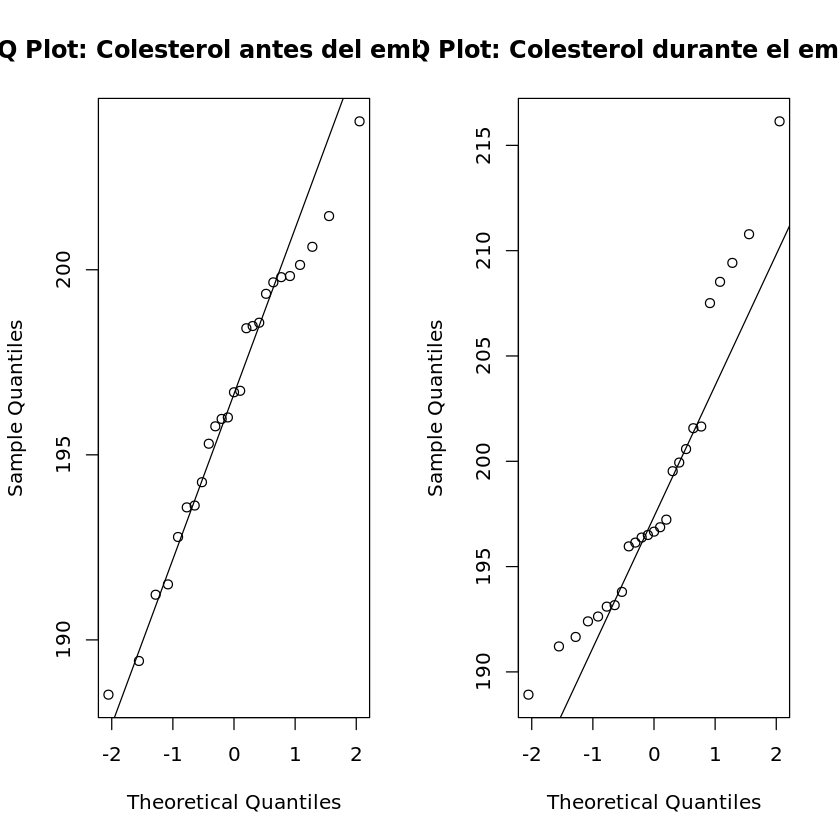

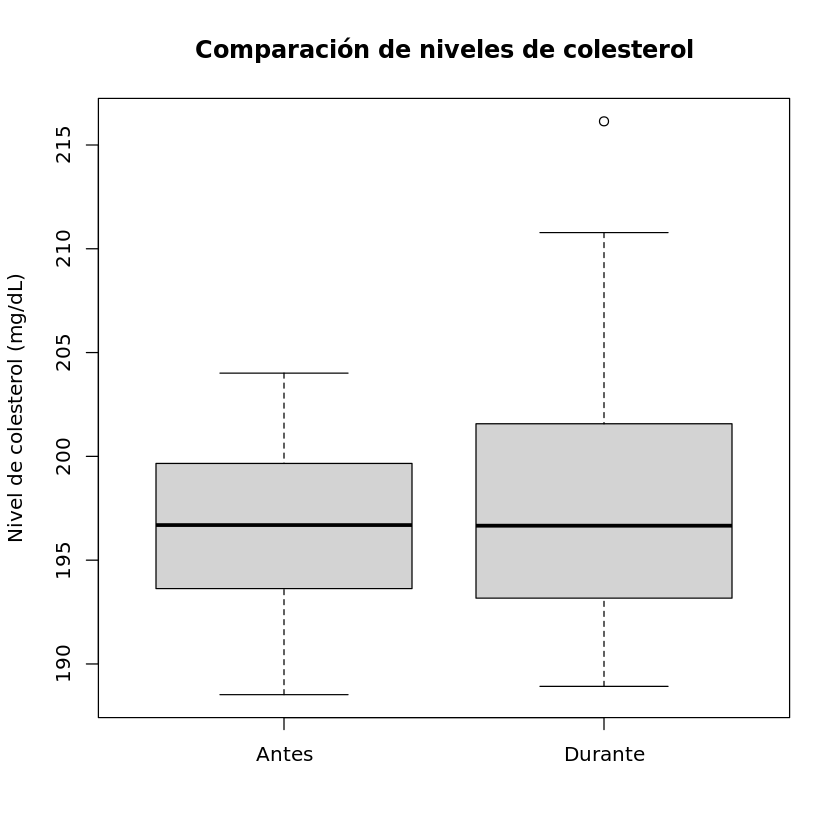

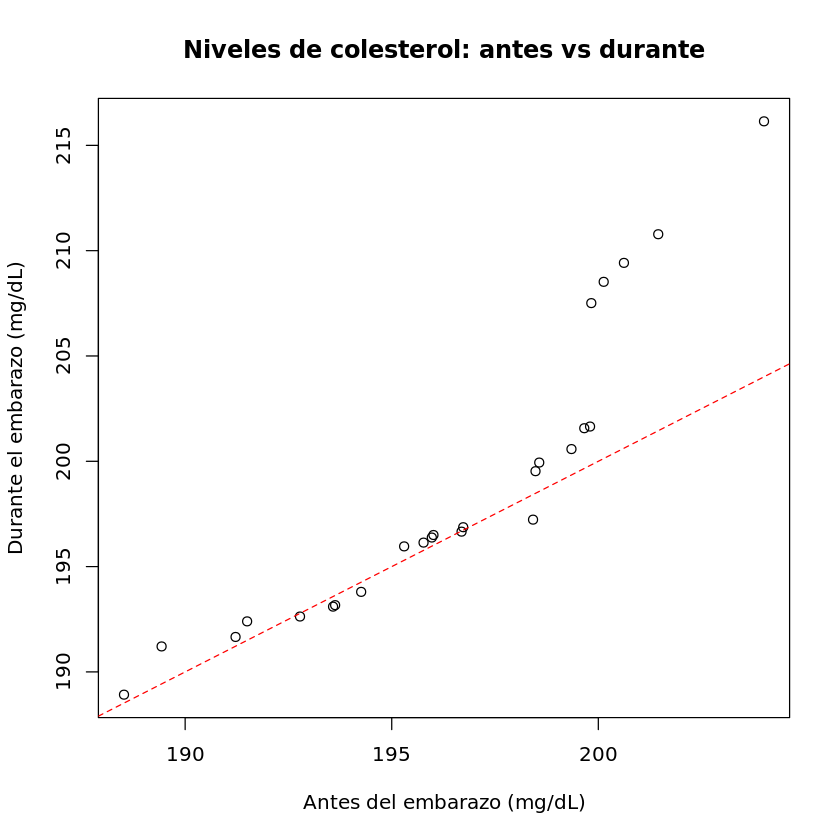

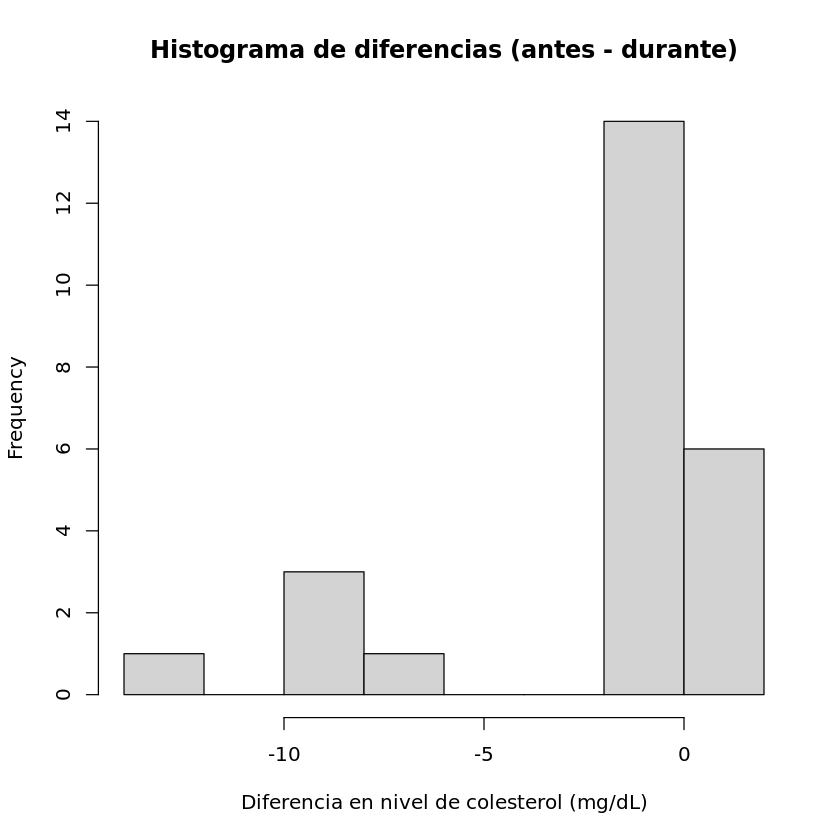

In [9]:
# Ejercicio 6: Estudio sobre niveles de colesterol durante el embarazo

# Datos proporcionados en la tabla 1
antes <- c(
    198.48, 196.73, 204.01, 195.97, 198.57, 198.42, 188.52, 200.13, 200.62, 191.22,
    201.45, 195.77, 196.01, 192.78, 191.50, 199.80, 196.69, 193.58, 189.43, 193.63,
    194.26, 199.66, 195.30, 199.35, 199.83
)

durante <- c(
    199.53, 196.87, 216.14, 196.38, 199.94, 197.23, 188.92, 208.52, 209.42, 191.66,
    210.78, 196.14, 196.50, 192.63, 192.40, 201.65, 196.66, 193.10, 191.21, 193.17,
    193.80, 201.57, 195.96, 200.58, 207.51
)

# a) Verificación de normalidad mediante gráficas cuantil-cuantil
par(mfrow = c(1, 2))
qqnorm(antes, main = "Q-Q Plot: Colesterol antes del embarazo")
qqline(antes)
qqnorm(durante, main = "Q-Q Plot: Colesterol durante el embarazo")
qqline(durante)
par(mfrow = c(1, 1))

# Estadísticas descriptivas
cat("Estadísticas descriptivas - Antes del embarazo:\n")
summary(antes)
cat("Desv. estándar:", sd(antes), "\n\n")

cat("Estadísticas descriptivas - Durante el embarazo:\n")
summary(durante)
cat("Desv. estándar:", sd(durante), "\n\n")

# b) Intervalos de confianza para las medias y diferencia de medias
# Para μx (antes) con 90% de confianza
ic_antes <- t.test(antes, conf.level = 0.90)
cat("IC 90% para la media antes del embarazo:\n")
ic_antes$conf.int

# Para μy (durante) con 90% de confianza
ic_durante <- t.test(durante, conf.level = 0.90)
cat("IC 90% para la media durante el embarazo:\n")
ic_durante$conf.int

# Para la diferencia de medias con 95% de confianza (muestras pareadas)
ic_diff <- t.test(antes, durante, paired = TRUE, conf.level = 0.95)
cat("IC 95% para la diferencia de medias (antes - durante):\n")
ic_diff$conf.int

# c) Comparación de varianzas
var_test <- var.test(antes, durante)
cat("Prueba F para comparación de varianzas:\n")
var_test

# d) Comparación de medias

# i) Muestras independientes, misma variabilidad
test_i <- t.test(antes, durante, var.equal = TRUE, alternative = "less")
cat("i) Prueba t, muestras independientes, misma variabilidad:\n")
test_i

# ii) Muestras independientes, relación 4σx = 7σy
# Adaptamos la fórmula de Welch-Satterthwaite
test_ii <- t.test(antes, durante, var.equal = FALSE, alternative = "less")
cat("ii) Prueba t, muestras independientes, varianzas diferentes:\n")
test_ii

# iii) Muestras independientes, sin conocimiento sobre varianzas
# Es el mismo caso que el anterior (prueba de Welch)
cat("iii) Prueba t, sin conocimiento sobre varianzas (Welch):\n")
test_ii

# iv) Muestras pareadas (el caso real de nuestros datos)
test_iv <- t.test(antes, durante, paired = TRUE, alternative = "less")
cat("iv) Prueba t, muestras pareadas:\n")
test_iv

# e) Comentarios generales
# Los comentarios se incluirán en la explicación del texto, fuera del código

# Visualización de los datos con boxplot para comparar
boxplot(list(Antes = antes, Durante = durante),
    main = "Comparación de niveles de colesterol",
    ylab = "Nivel de colesterol (mg/dL)"
)

# Gráfico de pares para visualizar la relación
plot(antes, durante,
    main = "Niveles de colesterol: antes vs durante",
    xlab = "Antes del embarazo (mg/dL)",
    ylab = "Durante el embarazo (mg/dL)"
)
abline(0, 1, col = "red", lty = 2) # Línea de referencia y=x

# Gráfico de diferencias (antes - durante)
diferencias <- antes - durante
hist(diferencias,
    main = "Histograma de diferencias (antes - durante)",
    xlab = "Diferencia en nivel de colesterol (mg/dL)"
)

# Ejercicio 7

Regla de decisión (5% significancia, colas iguales):
Rechazar H0 si T < 0.4455788 o T > 2.308827 

Regla de decisión (10% significancia, colas iguales):
Rechazar H0 si T < 0.5085454 o T > 2.011572 

Estadístico T observado: 1.443686 
Decisión (10% significancia): No rechazar H0 

Valor de Lambda: 0.6733679 
Estadístico -2ln(Λ): 0.7909268 


Valor-p: 0.37382 
Decisión (10% significancia usando distribución asintótica): No rechazar H0 


Warning message in title(...):
“conversion failure on 'Función Λ(t) para m=13, n=11' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'Función Λ(t) para m=13, n=11' in 'mbcsToSbcs': dot substituted for <9b>”
Warning message in title(...):
“conversion failure on 'Λ(t)' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(...):
“conversion failure on 'Λ(t)' in 'mbcsToSbcs': dot substituted for <9b>”


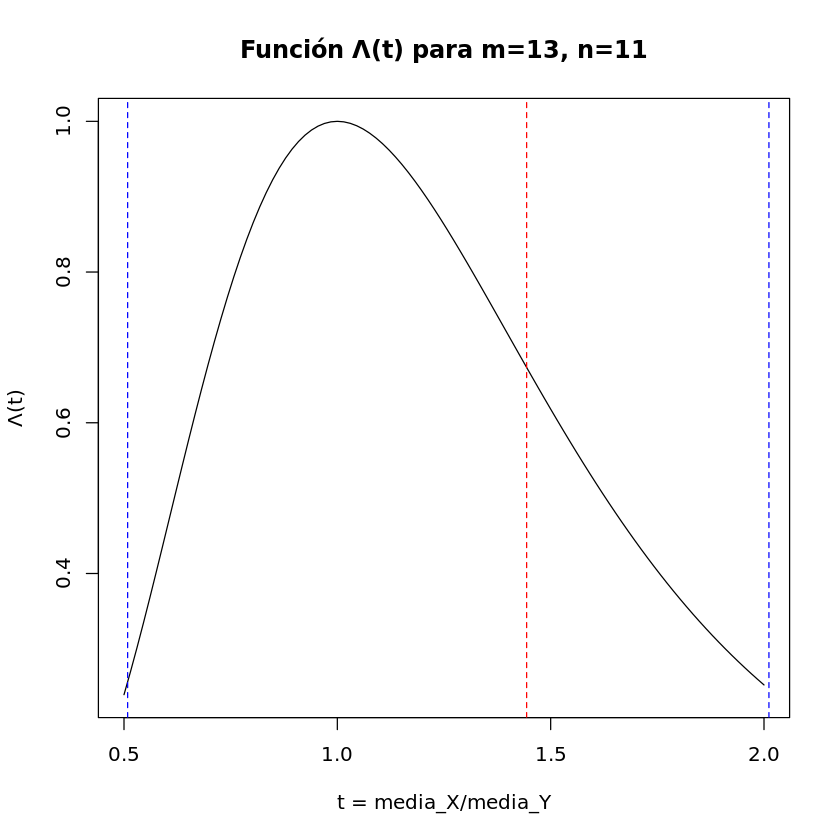

In [10]:
# Ejercicio 7: Prueba de hipótesis para muestras exponenciales

# g) Datos de las muestras X e Y
# Tenemos estadísticas resumen, pero no los datos originales
# Podemos trabajar con las medias muestrales
media_X <- 0.846
media_Y <- 0.586
m <- 13
n <- 11

# f) Regla para rechazar H0: λ = δ con 5% de significancia y colas iguales
alpha <- 0.05
# Puntos críticos para F(2m,2n) con peso del 2.5% en cada cola
f_lower <- qf(alpha / 2, 2 * m, 2 * n)
f_upper <- qf(1 - alpha / 2, 2 * m, 2 * n)

cat("Regla de decisión (5% significancia, colas iguales):\n")
cat("Rechazar H0 si T <", f_lower, "o T >", f_upper, "\n\n")

# g) Para el caso con significancia del 10%
alpha <- 0.10
f_lower_10 <- qf(alpha / 2, 2 * m, 2 * n)
f_upper_10 <- qf(1 - alpha / 2, 2 * m, 2 * n)

cat("Regla de decisión (10% significancia, colas iguales):\n")
cat("Rechazar H0 si T <", f_lower_10, "o T >", f_upper_10, "\n\n")

# Calculamos el estadístico T = media_X / media_Y
T_obs <- media_X / media_Y
cat("Estadístico T observado:", T_obs, "\n")

# Decisión con significancia del 10%
decision <- if (T_obs < f_lower_10 || T_obs > f_upper_10) "Rechazar H0" else "No rechazar H0"
cat("Decisión (10% significancia):", decision, "\n\n")

# h) Decisión usando distribución asintótica de -2ln(Λ)
# Calculamos el estadístico Lambda (cociente de verosimilitud)
lambda <- ((m / (m + n) + (n / (m + n)) * (media_Y / media_X))^(-m)) * ((n / (m + n) + (m / (m + n)) * (media_X / media_Y))^(-n))
cat("Valor de Lambda:", lambda, "\n")

# Estadístico -2ln(Λ)
stat_minus2lnL <- -2 * log(lambda)
cat("Estadístico -2ln(Λ):", stat_minus2lnL, "\n")

# Valor-p usando chi-cuadrado con 1 grado de libertad
p_valor <- 1 - pchisq(stat_minus2lnL, df = 1)
cat("Valor-p:", p_valor, "\n")

# Decisión con significancia del 10%
decision_h <- if (p_valor < 0.10) "Rechazar H0" else "No rechazar H0"
cat("Decisión (10% significancia usando distribución asintótica):", decision_h, "\n")

# Gráfica del cociente de verosimilitud Lambda vs T
t_values <- seq(0.5, 2.0, length.out = 100)
lambda_values <- rep(0, length(t_values))

for (i in 1:length(t_values)) {
    t <- t_values[i]
    lambda_values[i] <- ((m / (m + n) + (n / (m + n)) * (1 / t))^(-m)) * ((n / (m + n) + (m / (m + n)) * t)^(-n))
}

plot(t_values, lambda_values,
    type = "l",
    main = "Función Λ(t) para m=13, n=11",
    xlab = "t = media_X/media_Y",
    ylab = "Λ(t)"
)
abline(v = T_obs, col = "red", lty = 2)
abline(v = f_lower_10, col = "blue", lty = 2)
abline(v = f_upper_10, col = "blue", lty = 2)